In [1]:
library(Deriv)

Warning message:
“package ‘Deriv’ was built under R version 3.6.3”

In [2]:
set.seed(2020)

In [3]:
n <- 100
betas <- matrix(rbeta(n,5,1))

In [4]:
betas[1:5]

[1] 0.9015788 0.8901850 0.4406183 0.9419404 0.9596172

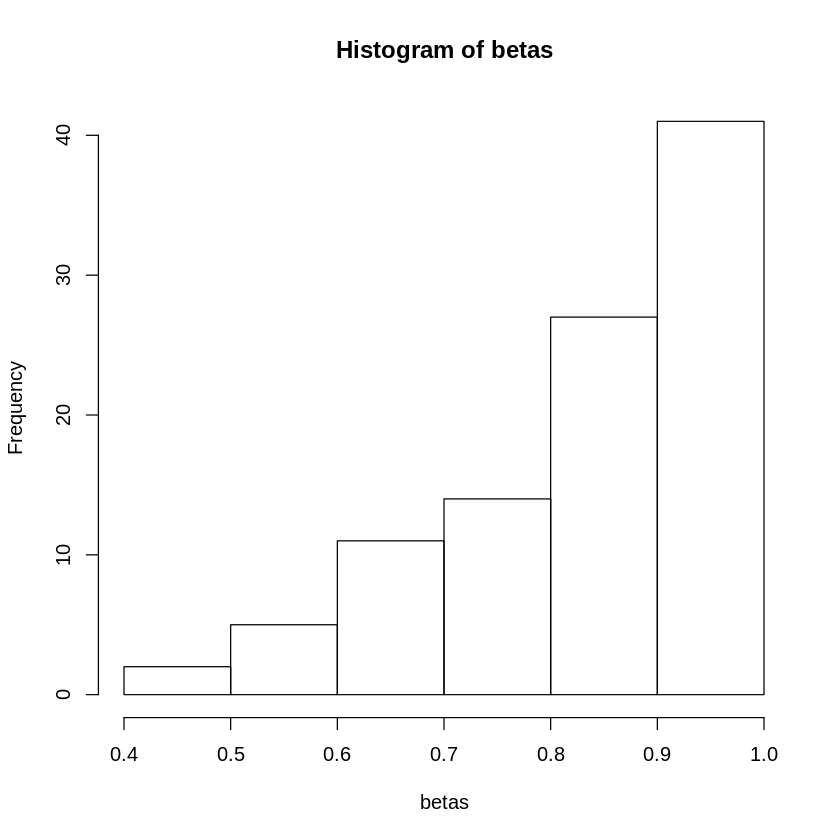

In [5]:
hist(betas)

In [6]:
dim(betas)

[1] 100   1

In [7]:
sal <- function(a,b,c,d){
    a + b*sinh(c*asinh(betas) + d)
    }
# sal = expression(a + b*sinh(c*asinh(y)+d))

In [8]:
drule[["asinh"]] <- alist(x=1/sqrt(x^2+1))

d_sal = Deriv(sal,"y")

In [10]:
phi_y <- sal(1,1,1,1)
mu_x <- mean(phi_y)
cov_xx <- cov(phi_y,phi_y)
    
gaussian_params <- 0.5* t(phi_y-mu_x) %*% solve(cov_xx) %*% (phi_y-mu_x)

ERROR: Error in t(phi_y - mu_x) %*% solve(cov_xx): non-conformable arguments


In [ ]:
dim(solve(cov_xx))

In [ ]:
# negative log likelihood function
# https://stackoverflow.com/questions/20479315/optim-function-argument-missing
# x = phi_y
nllf <- function(v){
    a <- v[1]
    b <- v[2]
    c <- v[3]
    d <- v[4]
    
    phi_y <- sal(a,b,c,d)
    mu_x <- mean(phi_y)
    cov_xx <- cov(phi_y,phi_y)
    
    gaussian_params <- 0.5* t(phi_y-mu_x) %*% solve(cov_xx) %*% (phi_y-mu_x)
    return(0.5*log(det(cov_xx)) + gaussian_params-sum(log(d_sal(a,b,c,d))))
    }


In [ ]:
d_sal

In [ ]:
#log likelihood
# L = -1/2log|C|-1/2(y-\mu)C^{-1}(y-\mu)+\sum log \partial \phi(yi)/\partial yi - N/2 log2\pi

In [ ]:
o = optim(par=c(0.5,0.5,0.5,0.5),fn=nllf,)
o

In [ ]:
par = o$par

In [ ]:
hist(sal(par[1],par[2],par[3],par[4],betas))